### MD no.8 vol.4
- pandasでcsvファイルの読み込み、データフレームとして格納
- csvファイル：datasets/throw_speed.csv
- matplotlibとseabornので棒グラフ表示

In [1]:
# pandas matplotlib seabornのimport
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 'datasets/throw_speed.csv'ファイルの読み込み
df = pd.read_csv("../datasets/throw_speed.csv",names=["date", "speed"])

# 先頭部分のデータ確認
df.head()

,date,speed
0,2019/05/22,Speed: 109
1,2019/06/22,Speed: 110
2,2019/07/22,Speed: 108
3,2019/08/22,Speed: 110
4,2019/09/22,Speed: 111


In [2]:
# データの統計情報を確認したいが、このままでは確認できない
df.describe()

,date,speed
count,44,44
unique,44,29
top,2019/05/22,Speed: 112
freq,1,5


In [3]:
# speed列に含まれた文字列「Speed:」を削除する（空文字に置き換える）
df["speed"] = df["speed"].str.replace("Speed: ","")
df.head()

,date,speed
0,2019/05/22,109
1,2019/06/22,110
2,2019/07/22,108
3,2019/08/22,110
4,2019/09/22,111


In [4]:
# df['speed']を文字列から数値（小数）に変換
df["speed"] = df["speed"].astype(float)
df.head()

,date,speed
0,2019/05/22,109.0
1,2019/06/22,110.0
2,2019/07/22,108.0
3,2019/08/22,110.0
4,2019/09/22,111.0


In [5]:
# df['date']は文字列なので日付・時刻型に変換する
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,speed
0,2019-05-22,109.0
1,2019-06-22,110.0
2,2019-07-22,108.0
3,2019-08-22,110.0
4,2019-09-22,111.0


In [6]:
# 改めて統計情報確認
df.describe()

,speed
count,44.000000
mean,177.545455
std,250.982576
min,108.000000
25%,111.750000
50%,116.500000
75%,140.500000
max,1390.000000


<AxesSubplot: xlabel='date', ylabel='speed [km]'>

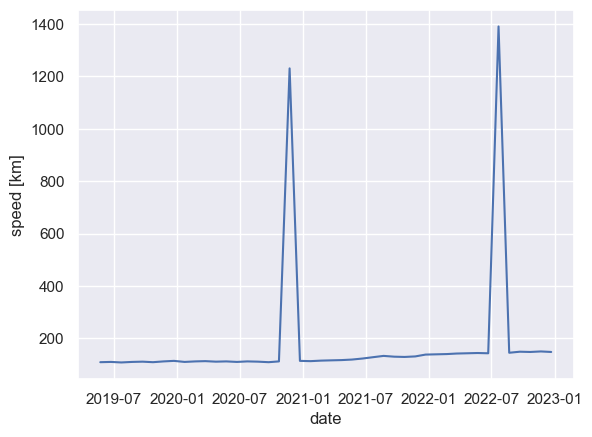

In [7]:
# 折れ線グラフの表示
sns.set_theme(style="darkgrid")
plt.ylabel('speed [km]')
sns.lineplot(x='date', y='speed', data=df)

In [8]:
# 異常値（外れ値）の除去
# データ数が少ない場合はthrow_speed.csvをコピー（生データを直接編集しない）
# コピーしたデータから該当箇所を手動で取り除く

# データ数が多い場合は以下の手順で外れ値を自動的に検出・除去する
# speedの平均値と標準偏差を算出
mean = df['speed'].mean()
std = df['speed'].std()

# 平均値との差が標準偏差の3倍以内だったデータのみを抽出し、clead_dfに格納
# dfの中に条件式を入れるとデータフレームの中から該当したデータのみを抽出できる
clean_df = df[abs(df['speed'] - mean) <= 3 * std]

# clean_dfが外れ値を除去したデータ
clean_df


,date,speed
0,2019-05-22,109.0
1,2019-06-22,110.0
2,2019-07-22,108.0
3,2019-08-22,110.0
4,2019-09-22,111.0
5,2019-10-22,109.0
6,2019-11-22,112.0
7,2019-12-22,114.0
8,2020-01-22,110.0
9,2020-02-22,112.0


<AxesSubplot: xlabel='Measurement Date [YY:MM:DD]', ylabel='Speed [km]'>

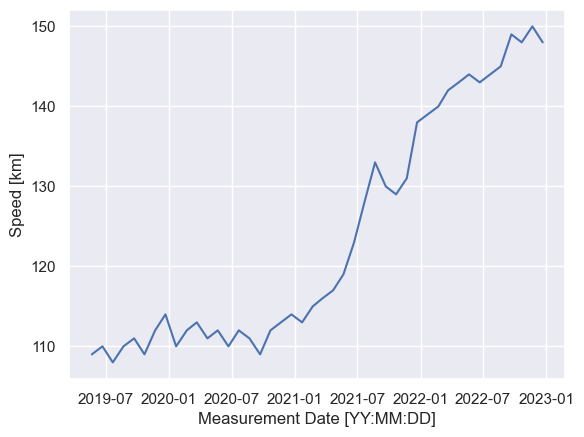

In [9]:
# 再度、折れ線グラフ表示
plt.xlabel('Measurement Date [YY:MM:DD]')
plt.ylabel('Speed [km]')
sns.lineplot(x='date', y='speed', data=clean_df)

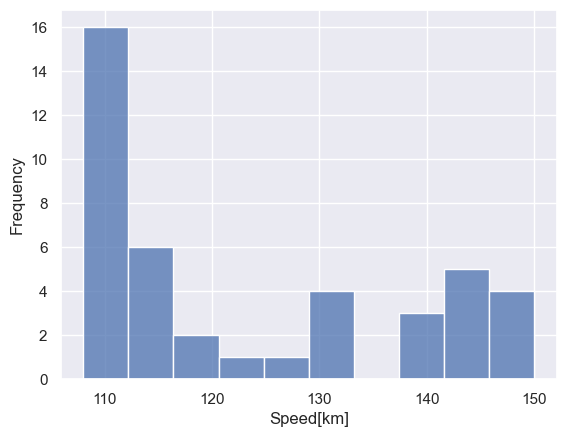

In [10]:
# ヒストグラムを表示
sns.histplot(data=clean_df, x='speed', bins=10)
plt.xlabel('Speed[km]')
plt.ylabel('Frequency')
plt.show()

# このデータではあまり有用性はないが、ヒストグラムからもspeedが上がらず苦労したことが分かる